**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024

## Uranium Mill Network Dynamics Simulation

### Coupling Solvent Extraction Stages Modules
In construction...<br>
[Project Repository on `GitHub`](https://github.com/dpploy/engy-4390/tree/main/projects/2024/u-mill)

---
## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
* [References](#refs)
---

## [Objectives](#toc)<a id="obj"></a>

- Test the implementation of coupled modules in Cortix. 
- Present an executable environment for learning how to use the Cortix modules developed for a simplified Whit Mesa Milling flowsheet.

In [1]:
'''Setup a White Mesa plant'''
from cortix import Cortix
from cortix import Network
from cortix import Units as unit 
white_mesa = Cortix(use_mpi=False, splash=True)    # system top level
wm_net = white_mesa.network = Network()            # Network

# help(white_mesa.network)

[22396] 2024-10-23 18:15:00,870 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

In [2]:
'''Setup Solvent Extraction 1s loop'''
import src.solvex         # gives access to python module docstring
solvex_01 = src.solvex.Solvex()
wm_net.module(solvex_01)

In [3]:
'''Setup Solvent Extraction 2nd loop'''
import src.solvex
solvex_02 = src.solvex.Solvex()
wm_net.module(solvex_02)

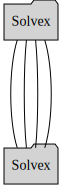

In [4]:
'''Setup Network'''
wm_net.connect([solvex_01, 'raffinate'], [solvex_02, 'extraction-feed'])
wm_net.connect([solvex_02,'raffinate'], [solvex_01, 'extraction-feed'])
wm_net.connect([solvex_01, 'product'], [solvex_02, 'stripping-feed'])
wm_net.connect([solvex_02, 'product'], [solvex_01, 'stripping-feed'])

wm_net.draw(engine='dot', node_shape='folder', size='600,1200')

In [5]:
'''Initialize run'''
end_time = 10*unit.day
time_step = 10.0*unit.minute
show_time = (True, unit.hour)

for m in wm_net.modules:
    m.end_time = end_time
    m.time_step = time_step
    m.show_time = show_time

In [ ]:
'''Run White Mesa and shutdown'''
white_mesa.run()
white_mesa.close()

[22396] 2024-10-23 18:15:06,250 - cortix - INFO - Launching Module <src.solvex.Solvex object at 0x0000025D5301B690>
[22396] 2024-10-23 18:15:06,356 - cortix - INFO - Launching Module <src.solvex.Solvex object at 0x0000025D56CA4CD0>


In [ ]:
'''Recover modules data'''
solvex_01 = wm_net.modules[0]
solvex_02 = wm_net.modules[1]

In [ ]:
'''1st Solvex Stage data'''
solvex_01.solvex_state_phase.plot(['aqueous-volume', 'organic-volume', 'liquid-volume'], show=True,figsize=[14,8])
solvex_01.solvex_product_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])
solvex_01.scrub_raffinate_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])

In [ ]:
'''2nd Solvex Stage data'''
solvex_02.solvex_state_phase.plot(['aqueous-volume', 'organic-volume', 'liquid-volume'], show=True,figsize=[14,8])
solvex_02.solvex_product_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])
solvex_02.scrub_raffinate_phase.plot(['mass-flowrate', 'mass-density'], show=True, figsize=[14,8])